# ARIMA

In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
data = pd.read_csv('AEP_hourly.csv', index_col=0)
data.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [9]:
data.index = pd.to_datetime(data.index)
data = data['AEP_MW'].resample('W').mean()
data.dropna(inplace=True)
data = data['2012':]
data.shape




(345,)

In [10]:
data.head(3)

Datetime
2012-01-01    15335.297619
2012-01-08    17105.244048
2012-01-15    17500.880952
Freq: W-SUN, Name: AEP_MW, dtype: float64

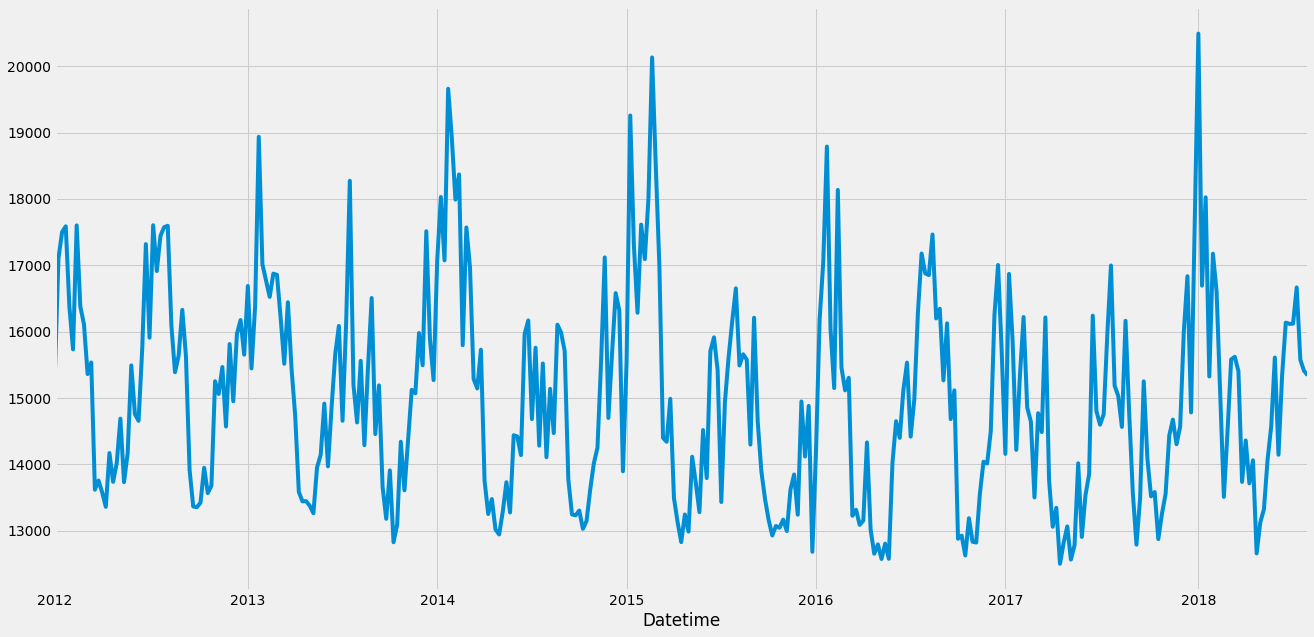

In [23]:
data.plot(figsize=(20, 10))
plt.show()

In [12]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [13]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7597.821388200358
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7132.499055224578
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:6179.199283347911
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5816.902610136043
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6195.871005071577
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6064.6601291164525
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5657.4891730970685
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5642.207167027354
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7329.432002449664
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7023.350268445236
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:6003.54660436471
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:5602.1266800422945
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6022.44406194864


/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5863.034507516084
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5569.344062014985
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:5528.713605170888
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:5812.909989309635
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5612.485814921427
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:5873.560672956486
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:5456.232234146833
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:5628.042206004788
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:5613.014961472352
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:5557.475899716858
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:5451.6794051250035
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:5764.477398426672
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:5562.250951799
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:5835.32517762716
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:5406.654094038698
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:5592.595987942614
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:5555.140936925705
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:5508.483968874446
ARIMA(0, 1, 1

/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:5629.932103448553
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:5856.804803949179
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:5452.276051910086
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:5629.714715803467
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:5630.237782326257
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:5496.705705572217
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:5448.521266436728
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:5782.469408355293
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:5580.126995733814
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:5832.5707682945385
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:5413.5679169464365
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:5594.648958681076
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:5574.139817261014
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:5485.832312404733
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:5406.52757708369
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:5790.396444824832
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:5589.7884830060175
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:5854.837947075892
ARIMA(1,

In [14]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1537      0.139      1.106      0.269      -0.119       0.426
ma.L1         -0.5136      0.129     -3.989      0.000      -0.766      -0.261
ar.S.L12      -0.2290      0.065     -3.521      0.000      -0.356      -0.102
ma.S.L12      -0.8331      0.042    -19.646      0.000      -0.916      -0.750
sigma2      1.258e+06   9.63e+04     13.071      0.000    1.07e+06    1.45e+06


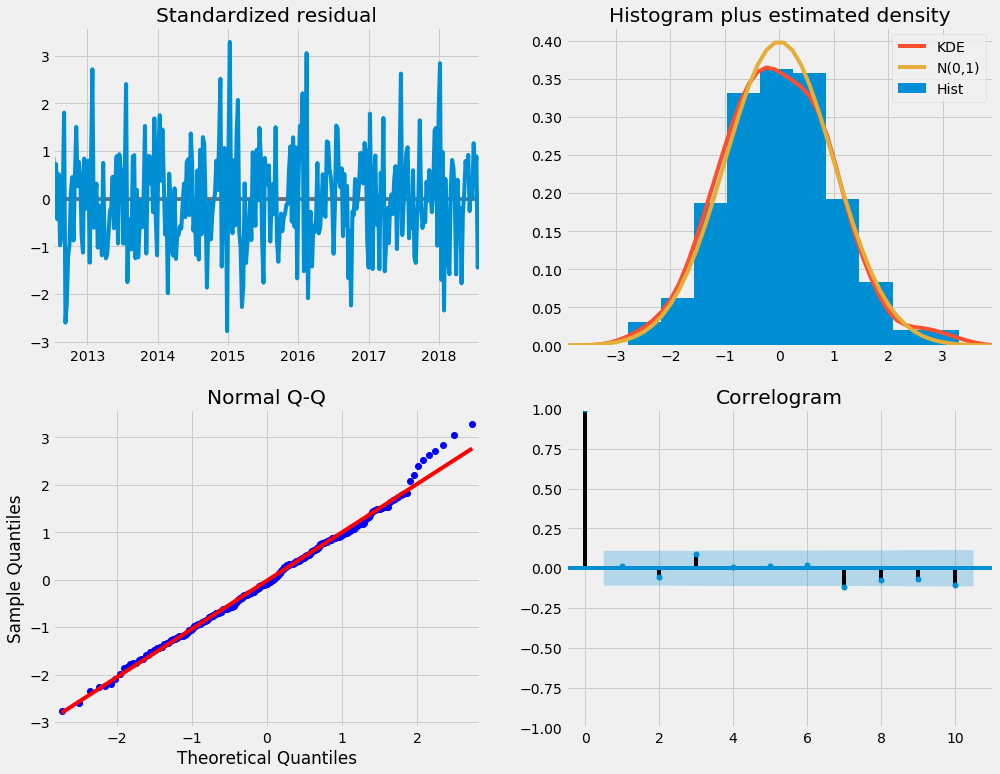

In [15]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2017-10-01'), dynamic=False)
pred_ci = pred.conf_int()

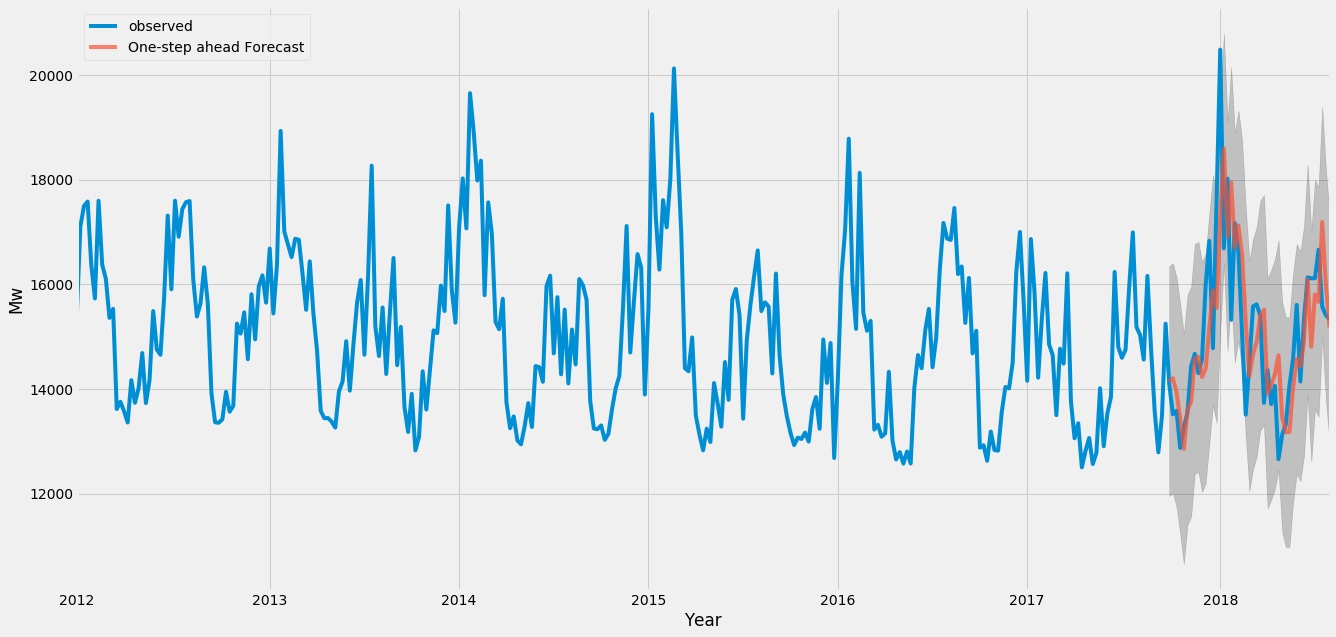

In [22]:
plt.figure(figsize=(20, 10))
ax = data['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Year')
ax.set_ylabel('Mw')
plt.legend()

plt.show()